# Consigna:
<img src="./1R_Control_2017-xx-xx_collazo.JPG" align="center" width="80%" />

# Ejercicio 1
Se nos hace saber que tenemos un sistema con una $G_{(S)}$ cuyos polos y ceros estan en la imagen y que su H es 1 por lo tanto$\rightarrow$
$$M_{(S)}=\frac{G_{(S)}}{1+G_{(S)}*H_{(S)}}$$
Por inspeccion de los polos y ceros la $G_{(S)}$ tiene esta forma:
$$\frac{S + 4}{\left(S + 1\right) \left(S + 2\right) \left(S + 6\right)}=\frac{S+4}{S^{3} + 9 S^{2} + 20 S + 12}$$
Entonces $M_{(S)}$sera:
$$\frac{S + 4}{\left(1 + \frac{S + 4}{\left(S + 1\right) \left(S + 2\right) \left(S + 6\right)}\right) \left(S + 1\right) \left(S + 2\right) \left(S + 6\right)}=\frac{S + 4}{S + \left(S + 1\right) \left(S + 2\right) \left(S + 6\right) + 4}$$

In [2]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
#from splane import pzmap, grpDelay, bodePlot
import numpy as np
S,t = symbols('S,t')

In [64]:
G_s=(S+4)/((S+6)*(S+2)*(S+1))
M_s=G_s/(1+G_s)
R_s=1/S
pprint(factor(M_s))
###Error=R(S)*1/(1+G(S))
Error=R_s*1/(1+G_s)
pprint(Error)

###Aplico teorema del valor final
expr = Limit(S*Error, S, 0)
print("e(inf)=")
pprint(expr)
print("Calculando e(inf)=")
pprint(expr.doit())

        S + 4        
─────────────────────
 3      2            
S  + 9⋅S  + 21⋅S + 16
               1               
───────────────────────────────
  ⎛             S + 4         ⎞
S⋅⎜1 + ───────────────────────⎟
  ⎝    (S + 1)⋅(S + 2)⋅(S + 6)⎠
e(inf)=
                  1             
 lim ───────────────────────────
S─→0⁺             S + 4         
     1 + ───────────────────────
         (S + 1)⋅(S + 2)⋅(S + 6)
Calculando e(inf)=
3/4


        S + 4        
─────────────────────
 3      2            
S  + 9⋅S  + 21⋅S + 16


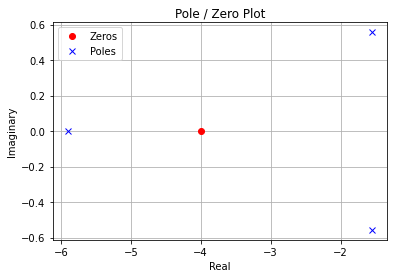

[-5.90057187 -1.54971406 -1.54971406] [ 0.          0.55676557 -0.55676557]


In [12]:
M_s=G_s/(1+G_s)
pprint(factor(M_s))

Num=[1,4]
Den=[1,9,21,16]
z, p, k = signal.tf2zpk(Num, Den)
plt.plot(np.real(z), np.imag(z), 'or')
plt.plot(np.real(p), np.imag(p), 'xb')
plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()
print(np.real(p),np.imag(p))

<img src="./Capture1.PNG" align="center" width="80%" />
$$\frac{\omega_n^2}{S^2+2*\xi*\omega_n*S+\omega_n^2}$$

$$t_s\approx \frac{4}{\xi*\omega_n}$$
$$M_{or}=e^{-\frac{\pi\xi}{\sqrt{1-\xi^2}}}$$
$$\omega_d=\omega_n*\sqrt{1-\xi^2}$$
$$t_p=\frac{\pi}{\omega_d}$$
De la tabla del apunte el $\xi$ tiene que ser mayor a 0.59
Y por consigna que el ts=2

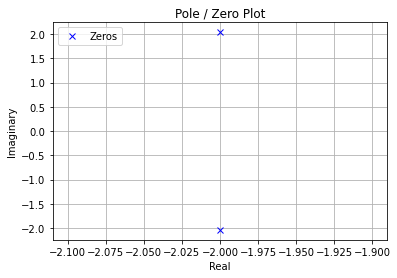

2.85714285714286/((S + 2.0 - 2.04040812244081*I)*(S + 2.0 + 2.04040812244081*I))
       2.85714285714286      
─────────────────────────────
 2                           
S  + 4.0⋅S + 8.16326530612245


In [25]:
##Entonces hago por ejemplo xi=0.7
xi=0.7
ts=2
wn=4/(xi*ts)
wd=wn*sqrt(1-xi**2)
plt.plot([-xi*wn,-xi*wn], [-wd,wd], 'xb')
plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()
##Con esto ya se como me tiene que quedar la funcion ahora busco que quede similar
###M_prima=wn/((S-(-xi*wn-wd*I))*(S-(-xi*wn+wd*I)))
M_prima=wn/((S-(-xi*wn-wd*I))*(S-(-xi*wn+wd*I)))
print("M_prima")
pprint(expand(M_prima))

In [71]:
##despejo a mano num y den
Nume=8.16/(S+4)
Deno=S*(S+4)/(S**3+9*S**2+20*S+12)
pprint(Nume)
pprint(Deno)
g_c=Nume/Deno
print("g_c=")
pprint(simplify(g_c))

G_prima=g_c*G_s
print("G prima=")
pprint(G_prima)
print("M_prima")
M_prima=G_prima/(1+G_prima)
pprint(simplify(M_prima))

 8.16
─────
S + 4
      S⋅(S + 4)      
─────────────────────
 3      2            
S  + 9⋅S  + 20⋅S + 12
g_c=
      3          2                  
8.16⋅S  + 73.44⋅S  + 163.2⋅S + 97.92
────────────────────────────────────
                      2             
             S⋅(S + 4)              
G prima=
        ⎛ 3      2            ⎞  
   8.16⋅⎝S  + 9⋅S  + 20⋅S + 12⎠  
─────────────────────────────────
S⋅(S + 1)⋅(S + 2)⋅(S + 4)⋅(S + 6)
M_prima
                 3          2                            
           8.16⋅S  + 73.44⋅S  + 163.2⋅S + 97.92          
─────────────────────────────────────────────────────────
     5         4          3           2                  
1.0⋅S  + 13.0⋅S  + 64.16⋅S  + 165.44⋅S  + 211.2⋅S + 97.92


# Inciso d)
$$M_{(S)}=\frac{8.16 S^{3} + 73.44 S^{2} + 163.2 S + 97.92}{1.0 S^{5} + 13.0 S^{4} + 64.
16 S^{3} + 165.44 S^{2} + 211.2 S + 97.92}$$
$$M_{(S)}=\frac{S + 4}{S + \left(S + 1\right) \left(S + 2\right) \left(S + 6\right) + 4}$$

<img src="./Capture3.PNG" align="center" width="80%" />

In [76]:
a=expand((S+6)*(S+2)*(S+1)/(S*(S+4)**2))
pprint(a)

        3                   2                                            
       S                 9⋅S                20⋅S                12       
──────────────── + ──────────────── + ──────────────── + ────────────────
 3      2           3      2           3      2           3      2       
S  + 8⋅S  + 16⋅S   S  + 8⋅S  + 16⋅S   S  + 8⋅S  + 16⋅S   S  + 8⋅S  + 16⋅S
